# 📊 Crime Rate Prediction Model  
## 🔍 Using Random Forest 

---

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
file_path = "/Users/harshbhalwar/Documents/crime_dataset_india.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


(None,
    Report Number   Date Reported Date of Occurrence Time of Occurrence  \
 0              1   02/01/20 0:00      01/01/20 0:00      01/01/20 1:11   
 1              2  01/01/20 19:00      01/01/20 1:00      01/01/20 6:26   
 2              3   02/01/20 5:00      01/01/20 2:00     01/01/20 14:30   
 3              4   01/01/20 5:00      01/01/20 3:00     01/01/20 14:46   
 4              5  01/01/20 21:00      01/01/20 4:00     01/01/20 16:51   
 
         City  Crime Code Crime Description  Victim Age Victim Gender  \
 0  Ahmedabad         576    IDENTITY THEFT          16             M   
 1    Chennai         128          HOMICIDE          37             M   
 2   Ludhiana         271        KIDNAPPING          48             F   
 3       Pune         170          BURGLARY          49             F   
 4       Pune         421         VANDALISM          30             F   
 
     Weapon Used   Crime Domain  Police Deployed Case Closed Date Case Closed  
 0  Blunt Object  Vio

In [30]:
unique_crimes = df["Crime Description"].unique()

no_of_unique_crimes = len(unique_crimes)
print(unique_crimes)
print(no_of_unique_crimes)

['IDENTITY THEFT' 'HOMICIDE' 'KIDNAPPING' 'BURGLARY' 'VANDALISM' 'ASSAULT'
 'VEHICLE - STOLEN' 'COUNTERFEITING' 'EXTORTION' 'PUBLIC INTOXICATION'
 'FRAUD' 'SEXUAL ASSAULT' 'DRUG OFFENSE' 'ARSON' 'CYBERCRIME'
 'TRAFFIC VIOLATION' 'SHOPLIFTING' 'ILLEGAL POSSESSION' 'FIREARM OFFENSE'
 'ROBBERY' 'DOMESTIC VIOLENCE']
21


In [31]:
detailed_crime_mapping = {
    "HOMICIDE": ["HOMICIDE"],
    "KIDNAPPING": ["KIDNAPPING"],
    "IDENTITY THEFT": ["IDENTITY THEFT"],
    "BURGLARY": ["BURGLARY"],
    "VANDALISM": ["VANDALISM"],
    "ASSAULT": ["ASSAULT", "SEXUAL ASSAULT"],
    "VEHICLE THEFT": ["VEHICLE - STOLEN"],
    "COUNTERFEITING": ["COUNTERFEITING"],
    "EXTORTION": ["EXTORTION"],
    "PUBLIC DISORDER": ["PUBLIC INTOXICATION"],
    "FRAUD": ["FRAUD"],
    "DRUG OFFENSE": ["DRUG OFFENSE"],
    "ARSON": ["ARSON"],
    "CYBERCRIME": ["CYBERCRIME"],
    "TRAFFIC VIOLATION": ["TRAFFIC VIOLATION"],
    "SHOPLIFTING": ["SHOPLIFTING"],
    "ILLEGAL POSSESSION": ["ILLEGAL POSSESSION"],
    "FIREARM OFFENSE": ["FIREARM OFFENSE"],
    "ROBBERY": ["ROBBERY"]
}

def categorize_crimes(description):
    for category, keywords in detailed_crime_mapping.items():
        if description in keywords:
            return category
    return 'OTHER'

df["Crime Category"] = df["Crime Description"].apply(categorize_crimes)

df[["City", "Crime Description", "Crime Category"]].head(20)

,City,Crime Description,Crime Category
0,Ahmedabad,IDENTITY THEFT,IDENTITY THEFT
1,Chennai,HOMICIDE,HOMICIDE
2,Ludhiana,KIDNAPPING,KIDNAPPING
3,Pune,BURGLARY,BURGLARY
4,Pune,VANDALISM,VANDALISM
5,Delhi,ASSAULT,ASSAULT
6,Chennai,VEHICLE - STOLEN,VEHICLE THEFT
7,Chennai,COUNTERFEITING,COUNTERFEITING
8,Mumbai,EXTORTION,EXTORTION
9,Chennai,PUBLIC INTOXICATION,PUBLIC DISORDER


In [32]:
crime_pivot  = df.pivot_table(index="City", columns="Crime Category", aggfunc="size", fill_value=0)

crime_pivot.reset_index(inplace=True)

crime_pivot.head(10)

Crime Category,City,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,FRAUD,...,IDENTITY THEFT,ILLEGAL POSSESSION,KIDNAPPING,OTHER,PUBLIC DISORDER,ROBBERY,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE THEFT
0,Agra,43,77,32,40,32,31,39,40,33,...,37,30,38,38,43,40,37,33,33,36
1,Ahmedabad,80,205,94,84,87,82,83,88,85,...,83,89,86,102,82,94,85,81,76,75
2,Bangalore,154,331,187,176,155,168,188,164,152,...,177,176,168,171,198,167,167,166,179,162
3,Bhopal,38,71,23,29,31,30,26,28,38,...,35,33,42,34,41,28,35,31,33,29
4,Chennai,138,227,134,115,117,103,122,122,114,...,128,107,135,97,107,108,116,110,124,131
5,Delhi,227,485,254,254,286,278,246,291,281,...,272,250,260,275,246,280,244,198,256,247
6,Faridabad,19,39,11,14,13,12,13,17,11,...,25,18,21,20,18,18,16,18,22,14
7,Ghaziabad,35,63,37,32,27,40,32,24,34,...,33,33,36,40,40,41,27,42,31,29
8,Hyderabad,152,250,140,136,139,134,124,138,126,...,159,142,126,143,143,138,120,135,131,165
9,Indore,28,69,31,32,34,34,39,45,33,...,34,29,30,33,26,41,30,32,28,37


In [33]:
city_population = {
    'Agra' : 1585704,
    'Ahmedabad'  : 5570585, 
    'Bangalore' :8443675 , 
    'Bhopal' : 1798218, 
    'Chennai' : 7088000, 
    'Delhi' : 16787941, 
    'Faridabad' :1404653 , 
    'Ghaziabad' : 2358525, 
    'Hyderabad' :6809970 , 
    'Indore' : 1994397, 
    'Jaipur' : 3046163, 
    'Kalyan' : 1247327, 
    'Kanpur' : 2767031, 
    'Kolkata' : 4496694, 
    'Lucknow' : 2817105, 
    'Ludhiana' :1618879 , 
    'Meerut' : 1305429, 
    'Mumbai' : 12442373, 
    'Nagpur' : 2405665, 
    'Nashik' : 1486053, 
    'Patna' : 1684222, 
    'Pune' : 3124458, 
    'Rajkot' : 1390640,
    'Srinagar' : 1180570, 
    'Surat' : 4467797, 
    'Thane' : 1841488, 
    'Varanasi' :1198491 , 
    'Vasai' : 1958000, 
    'Visakhapatnam' :1728128 
}

city_unemployment_rate = {
    'Agra': 5.5,
    'Ahmedabad': 6.4,
    'Bangalore': 1.8,
    'Bhopal': 0.1,
    'Chennai': 3.0, 
    'Delhi': 2.1,
    'Faridabad': 3.0,
    'Ghaziabad': 3.0,
    'Hyderabad': 7.1,
    'Indore': 0.8,
    'Jaipur': 4.7,
    'Kalyan': 3.0,
    'Kanpur': 7.7,
    'Kolkata': 4.14,
    'Lucknow': 3.0,
    'Ludhiana': 6.3,
    'Meerut': 3.9,
    'Mumbai': 3.0,
    'Nagpur': 3.0,
    'Nashik': 3.0,
    'Patna': 13.2,
    'Pune': 3.0,
    'Rajkot': 3.0,
    'Srinagar': 3.0,
    'Surat': 0.6,
    'Thane': 3.0,
    'Varanasi': 3.0,
    'Vasai': 3.0,
    'Visakhapatnam': 3.0
}

city_literacy_rate = {
    'Agra' : 73.11,
    'Ahmedabad'  : 89.62, 
    'Bangalore' : 88.71, 
    'Bhopal' :85.24 , 
    'Chennai' : 90.33, 
    'Delhi' : 86.21, 
    'Faridabad' : 83.04, 
    'Ghaziabad' : 78.07, 
    'Hyderabad' : 83.26, 
    'Indore' : 82.32, 
    'Jaipur' : 84.34, 
    'Kalyan' : 89.41, 
    'Kanpur' : 79.65, 
    'Kolkata' : 87.14, 
    'Lucknow' : 84.72, 
    'Ludhiana' : 85.38, 
    'Meerut' : 76.28, 
    'Mumbai' : 90.28, 
    'Nagpur' : 91.92, 
    'Nashik' : 89.85, 
    'Patna' : 83.37, 
    'Pune' : 91.61, 
    'Rajkot' : 86.11, 
    'Srinagar' : 70.98, 
    'Surat' : 86.65, 
    'Thane' : 89.41, 
    'Varanasi' : 80.12, 
    'Vasai' : 85.00, 
    'Visakhapatnam' :81.79 
}

crime_pivot['Population'] = crime_pivot['City'].map(city_population)
crime_pivot['Unemployment Rate'] = crime_pivot['City'].map(city_unemployment_rate)
crime_pivot['Literacy Rate'] = crime_pivot['City'].map(city_literacy_rate)

In [34]:
# Calculate Crime Rate

crime_columns = ['ARSON', 'ASSAULT', 'BURGLARY', 'COUNTERFEITING', 'CYBERCRIME',
                 'DRUG OFFENSE', 'EXTORTION', 'FIREARM OFFENSE', 'FRAUD', 'OTHER',
                 'PUBLIC DISORDER', 'ROBBERY', 'SHOPLIFTING', 'TRAFFIC VIOLATION',
                 'VANDALISM', 'VEHICLE THEFT']

crime_pivot['Total Crimes'] = crime_pivot[crime_columns].sum(axis=1)
crime_pivot['Crime Rate'] = (crime_pivot['Total Crimes'] / crime_pivot['Population']) * 100000

In [8]:
crime_pivot.head()

Crime Category,City,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,FRAUD,...,ROBBERY,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE THEFT,Population,Unemployment Rate,Literacy Rate,Total Crimes,Crime Rate
0,Agra,43,77,32,40,32,31,39,40,33,...,40,37,33,33,36,1585704,5.5,73.11,627,39.540797
1,Ahmedabad,80,205,94,84,87,82,83,88,85,...,94,85,81,76,75,5570585,6.4,89.62,1483,26.621980
2,Bangalore,154,331,187,176,155,168,188,164,152,...,167,167,166,179,162,8443675,1.8,88.71,2885,34.167587
3,Bhopal,38,71,23,29,31,30,26,28,38,...,28,35,31,33,29,1798218,0.1,85.24,545,30.307782
4,Chennai,138,227,134,115,117,103,122,122,114,...,108,116,110,124,131,7088000,3.0,90.33,1985,28.005079


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [54]:
# Step 2: Encode city using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_city = encoder.fit_transform(crime_pivot[['City']])
city_columns = encoder.get_feature_names_out(['City'])

# Save encoder for later prediction use
joblib.dump(encoder, 'city_encoder.pkl')


# Create new dataframe with encoded city columns
df_encoded = pd.concat([
    pd.DataFrame(encoded_city, columns=city_columns),
    crime_pivot
], axis=1)

# Drop non-numeric columns and redundant ones
df_encoded.drop(['City', 'Total Crimes'], axis=1, inplace=True)

# Step 3: Split data into training and testing sets
X = df_encoded.drop(['Crime Rate'], axis=1)
y = df_encoded['Crime Rate']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train['Population']



26     1198491
13     4496694
15     1618879
11     1247327
17    12442373
1      5570585
4      7088000
5     16787941
2      8443675
24     4467797
3      1798218
23     1180570
25     1841488
18     2405665
28     1728128
20     1684222
7      2358525
10     3046163
14     2817105
19     1486053
6      1404653
Name: Population, dtype: int64

In [38]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters
parameters = {
    'n_estimators' : [20, 40, 60, 80, 100, 120],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [2, 4, 6, 8, 10],
    'min_samples_split' : [2, 3, 4, 5],
    'max_samples' : [0.5, 0.75, 1.0],
}


In [39]:
treemodel = RandomForestRegressor()

cv = GridSearchCV(treemodel, parameters, cv=5, scoring='neg_mean_squared_error')
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.5, 0.75, 1.0],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [20, 40, 60, 80, 100, 120]},
             scoring='neg_mean_squared_error')

In [40]:
cv.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'max_samples': 0.5,
 'min_samples_split': 4,
 'n_estimators': 20}

In [41]:
y_pred = cv.predict(X_test)

In [42]:
print(y_pred)

[25.92965241 28.08239732 31.1575902  24.69389212 31.76317311 29.71341011
 31.66806738 32.80956572]


In [66]:
rf = RandomForestRegressor(max_depth=2, max_features='log2', max_samples=0.5, min_samples_split=3, n_estimators=20, random_state=42)

rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(y_pred1)
print(y_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred1))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred1))
print("R2 score ", r2_score(y_test, y_pred1))

[24.20354946 23.75097277 32.77774931 23.51187893 31.46863883 32.08228076
 30.92009163 31.8056675 ]
27    14.964249
16    24.896030
12    32.308998
22    18.552609
8     33.979592
9     28.680348
21    58.186092
0     39.540797
Name: Crime Rate, dtype: float64
Mean Squared Error:  116.57936717724526
Mean Absolute Error:  7.090799269214161
R2 score  0.269171802503805


In [67]:
import joblib

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)

joblib.dump(y_pred, "randomForestPrediction")
joblib.dump(y_test, "testing_data")

print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score: ", r2_score(y_test, y_pred))

Mean Absolute Error (MAE):  6.120855371939628
Mean Squared Error (MSE):  88.15888502311098
Root Mean Squared Error (RMSE):  9.389296300741126
R² Score:  0.4473378901023046


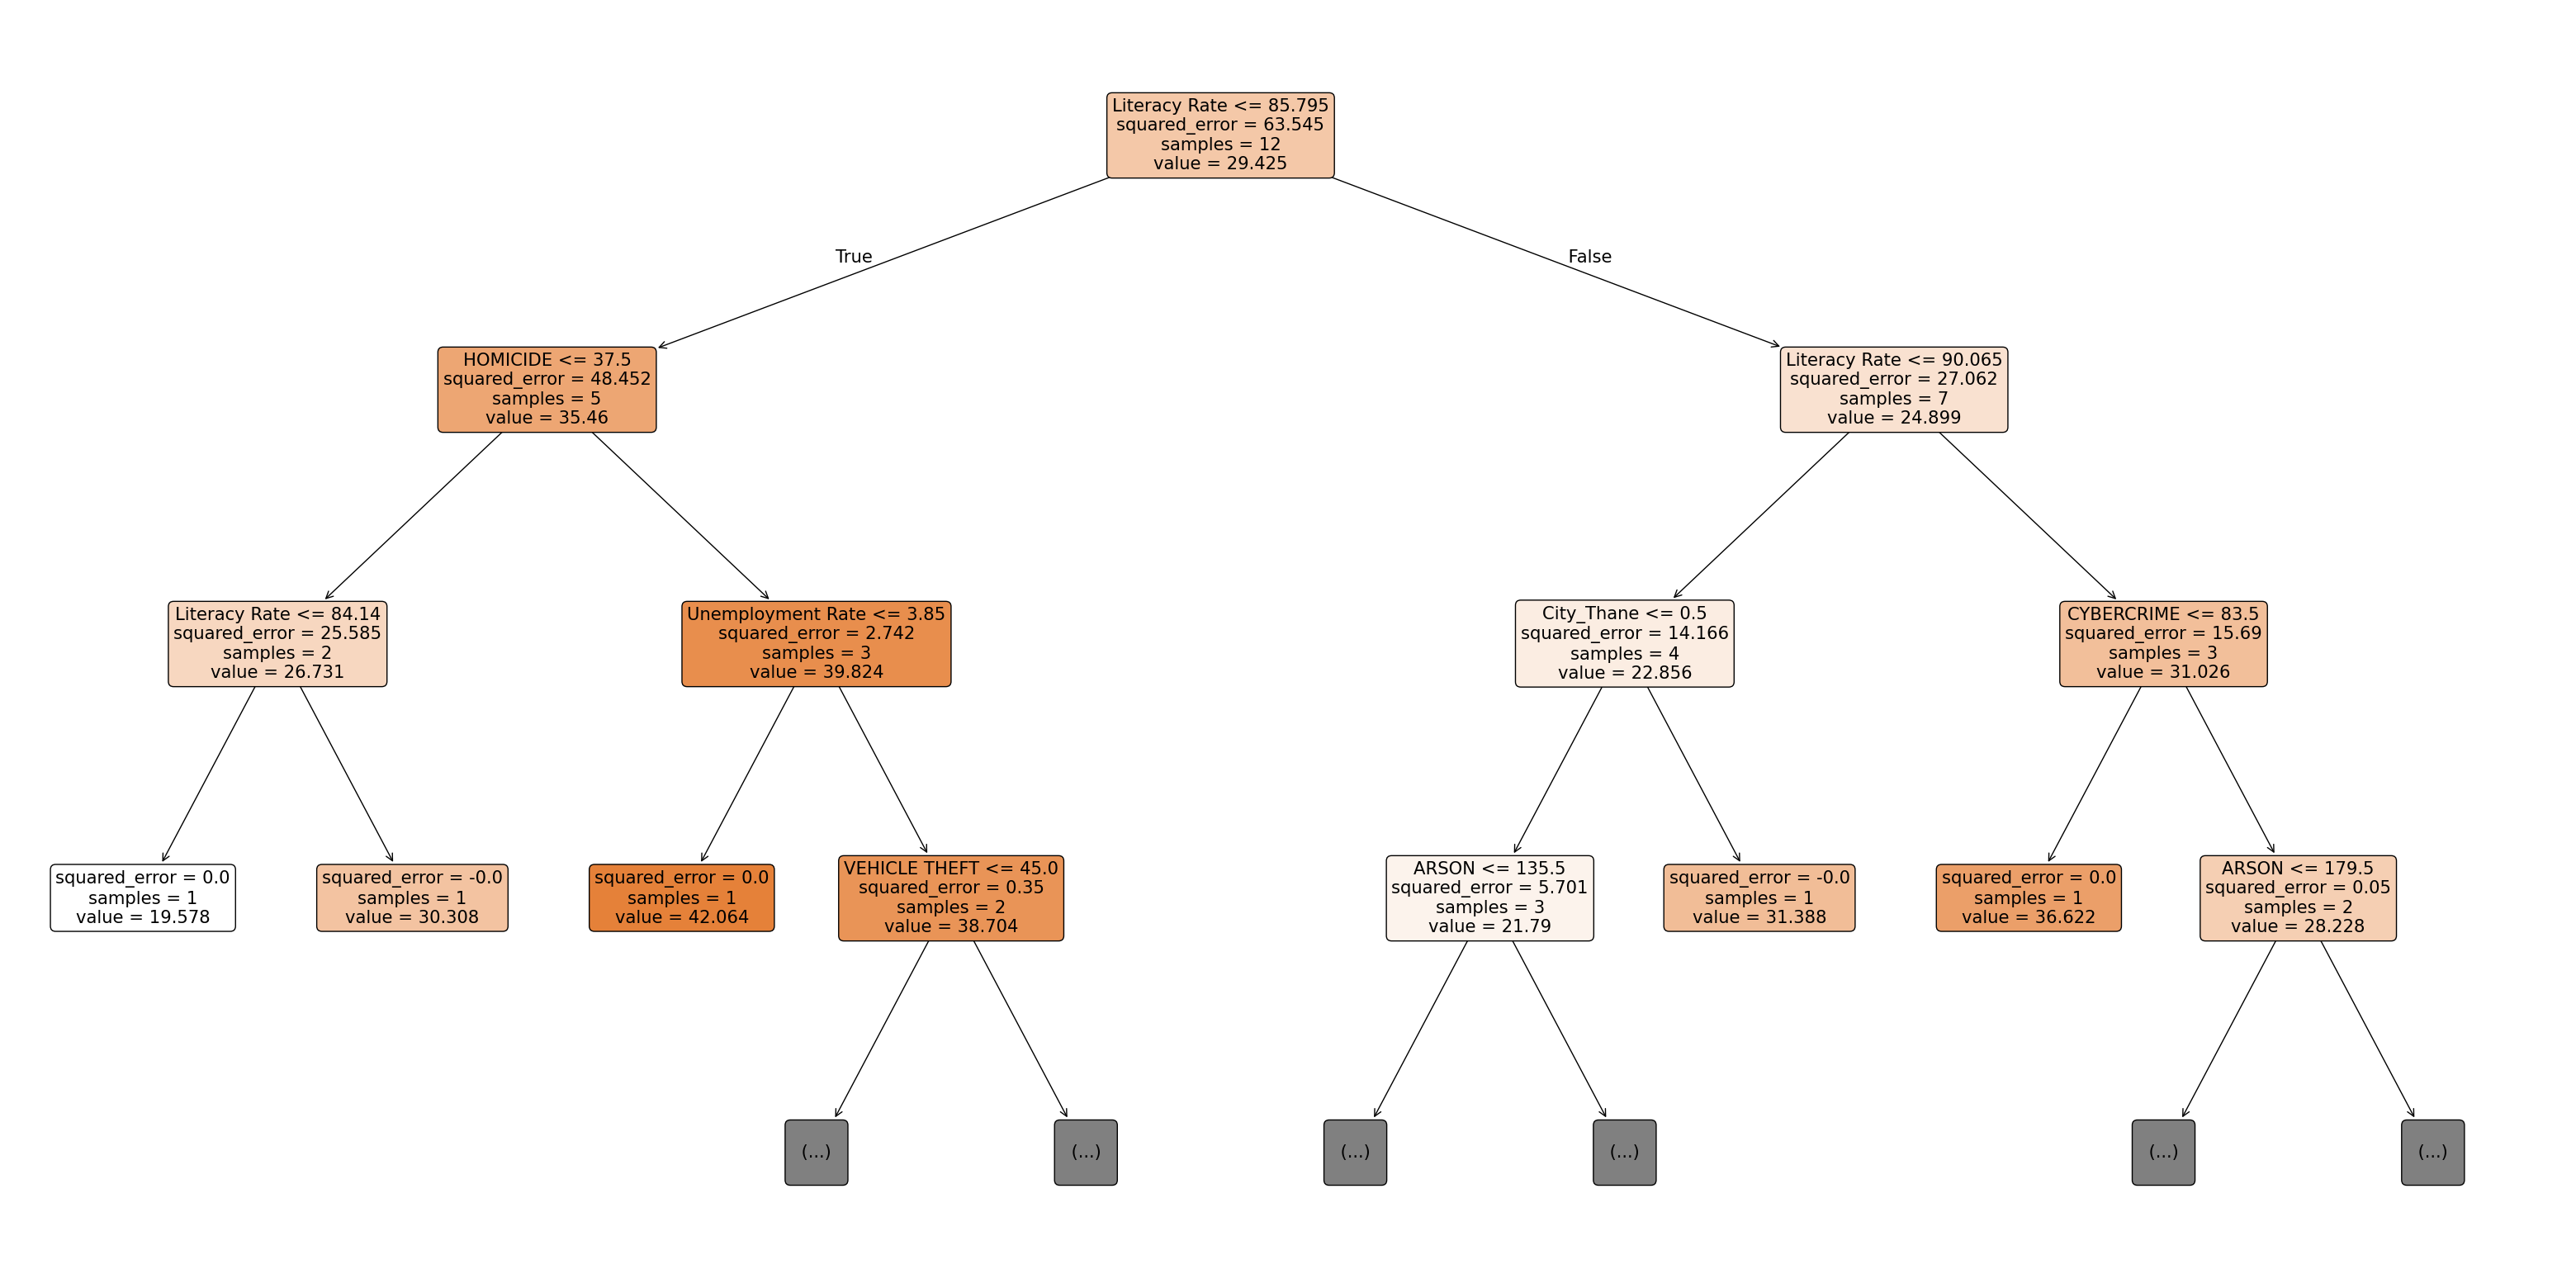

In [46]:
from sklearn.tree import plot_tree
estimator = model.estimators_[0]

plt.figure(figsize=(40, 20))
# Combine one-hot encoded city columns and crime columns for feature names
feature_names = list(df_encoded.columns[:-1])  # Exclude the target column 'Crime Rate'

plot_tree(estimator,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for readability
plt.show()

In [ ]:

joblib.dump(model, 'random_forest.pkl')

['random_forest.pkl']